# **KHANIF FAUZI PAMBUDI (LIVE CODE 3)**

# **PROBLEMS**

Kamu adalah seorang data scientist di salah satu perusahaan e-commerce. Saat ini, kamu terlibat dalam proyek bersama dengan tim produk dan tim UI/UX untuk merubah tampilan landing page. Menggunakan dataset dari https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI, menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1? dan buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis).

# **IMPORT LIBRARY**

Melakukan pemanggilan library yang digunakan untuk proses perhitungan

In [111]:
import numpy as np
import pandas as pd
import scipy

# **DATA LOADING**

Melakukan load data pada dataset yang diberikan untuk mengetahui strukutur pada data tersebut

In [112]:
df = pd.read_csv('/content/livecode3.csv')
df

,user_id,timestamp,group,landing_page,purchased
0,851104,11:48.6,control,old_page,0.0
1,804228,01:45.2,control,old_page,0.0
2,661590,55:06.2,treatment,new_page,0.0
3,853541,28:03.1,treatment,new_page,0.0
4,864975,52:26.2,control,old_page,1.0
...,...,...,...,...,...
174468,783174,42:53.1,control,old_page,0.0
174469,934271,52:37.5,control,old_page,0.0
174470,670542,12:09.8,treatment,new_page,0.0
174471,877812,13:17.9,treatment,new_page,1.0


Keterangan Dataset:

user_id = id pelanggan;
timestamp = Waktu ketika pelanggan mengakses laman web;
group = grup kontrol dan treatment;
landing_page = landing page yang diakses oleh pelanggan (laman lama atau laman baru);
purchased = 0 : tidak ada pembelian, and 1: ada pembelian;

# **DATA EXPLORATION**

In [113]:
len(df) #memeriksa jumlah row keselurhan pada dataset

174473

In [114]:
df.shape #melihat jumlah row dan jumlah kolom pada dataset

(174473, 5)

In [115]:
df.head() #melihat 5 data teratas

,user_id,timestamp,group,landing_page,purchased
0,851104,11:48.6,control,old_page,0.0
1,804228,01:45.2,control,old_page,0.0
2,661590,55:06.2,treatment,new_page,0.0
3,853541,28:03.1,treatment,new_page,0.0
4,864975,52:26.2,control,old_page,1.0


In [117]:
df.tail() #melihat 5 data terbawah

,user_id,timestamp,group,landing_page,purchased
174468,783174,42:53.1,control,old_page,0.0
174469,934271,52:37.5,control,old_page,0.0
174470,670542,12:09.8,treatment,new_page,0.0
174471,877812,13:17.9,treatment,new_page,1.0
174472,6756,NaN,NaN,NaN,NaN


In [118]:
df.info() #melihat data info untuk kolom dan tipe data nya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174473 entries, 0 to 174472
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       174473 non-null  int64  
 1   timestamp     174472 non-null  object 
 2   group         174472 non-null  object 
 3   landing_page  174472 non-null  object 
 4   purchased     174472 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [119]:
df.describe()

,user_id,purchased
count,174473.000000,174472.000000
mean,787720.946708,0.119979
std,91129.474720,0.324938
min,6756.000000,0.000000
25%,708809.000000,0.000000
50%,787682.000000,0.000000
75%,866466.000000,0.000000
max,945997.000000,1.000000


# **DATA PROCESSING (MISSING VALUE)**

In [120]:
df.isna().sum() #mengecek apakah ada missing value atau tidak

user_id         0
timestamp       1
group           1
landing_page    1
purchased       1
dtype: int64

Dari data di atas terdapat missing value pada kolom timestamp, group, landing_page, dan purchased. Karena misssing value pada kolom tersebut hanya 1 data maka pengisian missing value akan diisi menggunakan nilai modus

Mencari nilai modus untuk mengisi missing value dengan nilai modus

In [121]:
time = df['timestamp'] #mencari modus dari data timestamp
print(time.mode())

0    21:04.1
dtype: object


In [122]:
grp = df['group'] #mencari modus dari data group
print(grp.mode())

0    treatment
dtype: object


In [123]:
lp = df['landing_page']
print(lp.mode())

0    new_page
dtype: object


In [124]:
prchs = df['purchased']
print(prchs.mode())

0    0.0
dtype: float64


setelah mengetahui masing-masing nilai modus pada setiap kolom langkah selanjutnya mengisi kolom dengan nilai modus yang sudah didapatkan

In [ ]:
df['timestamp'].fillna('21:04.1', inplace = True) #mengisi missing value timestamp dengan nilai modus 21:04.1

In [ ]:
df['group'].fillna('treatment', inplace = True) #mengisi missing value group dengan nilai modus treatment

In [87]:
df['landing_page'].fillna('new_page', inplace = True) #mengisi missing value landing page dengan nilai modus new_page

In [88]:
df['purchased'].fillna('0.0', inplace = True) #mengisi missing value purchased dengan nilai modus 0.0

setelah missing value diisi kemudian dicek kembali apakah semua data sudah terisi atau belum

In [125]:
df.isna().sum() #mengecek apakah ada missing value atau tidak

user_id         0
timestamp       1
group           1
landing_page    1
purchased       1
dtype: int64

setelah dicek kembali sudah tidak ada missing value maka dataset sudah dapat diolah

# **CENTRAL TENDENCY**

# **MENGHITUNG MEAN**

In [126]:
user = df["user_id"] #menghitung mead dari kolom user id
np.mean(user)

787720.9467080866

# **MENGHITUNG MEDIAN**

In [127]:
user = df["user_id"] #menghitung mead dari kolom user id
np.median(user)

787682.0

# **MENCARI MODUS**

In [128]:
grp = df["group"] #mencari modus pada data group
print(grp.mode())

0    treatment
dtype: object


Terlihat bahwa modus dari data group adalah treatment

In [129]:
lp = df["landing_page"] #mencari modus pada data landing page
print(lp.mode())

0    new_page
dtype: object


Terlihat bahwa modus dari data landing_page adalah new_page

In [130]:
prchs = df["purchased"] #mencari modus pada data purchased
print(prchs.mode())

0    0.0
dtype: float64


Terlihat bahwa modus dari data purchased adalah 0

# **A/B TESTING**

In [131]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from math import ceil
%matplotlib inline

plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
effect_size = sms.proportion_effectsize(0.13, 0.15)   

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  

required_n = ceil(required_n)                                               

print(required_n)

4720


4720 merupakan jumlah masing-masing data yang harus dilakukan untuk melakukan hypothesis testing pada setiap kategori dalam dataset yang ingin dilakukan pengujian hipotesis. Sehingga dari dataset yang ingin dilakukan testing jumlah testingnya masing-masing harus seimbang yaitu 4720 pada setiap kategorinya

In [132]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'Terdapat {multi_users} pengguna yang muncul beberapakali dalam dataset')

Terdapat 1357 pengguna yang muncul beberapakali dalam dataset


In [133]:
users_to_drop = session_counts[session_counts > 1].index

df = df[~df['user_id'].isin(users_to_drop)]
print(f'Dataset terupdate saat ini memiliki {df.shape[0]} entri')

Dataset terupdate saat ini memiliki 171759 entri


In [134]:
control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=22)
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=22)

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test

,user_id,timestamp,group,landing_page,purchased
0,664266,02:54.9,control,old_page,0.0
1,913295,28:17.0,control,old_page,0.0
2,718855,02:17.3,control,old_page,0.0
3,700940,20:00.9,control,old_page,0.0
4,923303,38:16.8,control,old_page,0.0
...,...,...,...,...,...
9435,726358,54:31.6,treatment,new_page,0.0
9436,665958,20:18.9,treatment,new_page,1.0
9437,945707,34:39.7,treatment,new_page,0.0
9438,777143,30:23.2,treatment,new_page,0.0


Data di atas merupakan sample dataset yang akan dilakukan A/B testing

In [135]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       9440 non-null   int64  
 1   timestamp     9440 non-null   object 
 2   group         9440 non-null   object 
 3   landing_page  9440 non-null   object 
 4   purchased     9440 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 368.9+ KB


melihat informasi dataset untuk melakukan A/B Testing

In [136]:
ab_test['group'].value_counts()

treatment    4720
control      4720
Name: group, dtype: int64

Membagi data group ke dalam dua kategori treatment dan control untuk dilakukan pengujian masing-masing 4720 untuk kategori treatment dan 4720 untuk kategori control

# **MELAKUKAN VISUALISASI DATA TESTING**

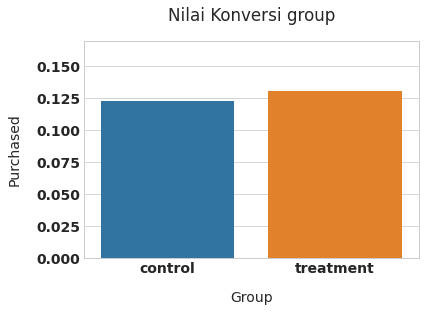

In [137]:
plt.figure(figsize=(6,4))

sns.barplot(x=ab_test['group'], y=ab_test['purchased'], ci=False)

plt.ylim(0, 0.17)
plt.title('Nilai Konversi group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Purchased', labelpad=15);

# **MELAKUKAN HYPOTHESIS TESTING**

untuk melakukan hipotesis kali ini ditentukan h0 dan h1 sebagai berikut untuk **h0 merupakan hipotesis bahwa tampilan UI/UX tidak perlu diubah** dan untuk **h1 merupakan hipotesis bahwa tampilan UI/UX perlu diubah**

In [138]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab_test[ab_test['group'] == 'control']['purchased']
treatment_results = ab_test[ab_test['group'] == 'treatment']['purchased']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% untuk control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% untuk treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -1.17
p-value: 0.240
ci 95% untuk control group: [0.114, 0.132]
ci 95% untuk treatment group: [0.121, 0.141]


hasil dari hypothesis testing didapatkan z statistics = -0,99, p-value = 0.321, ci 95% untuk control group = [0.114, 0.132], dan ci 95% untuk treatment group = [0.120, 0.139]

# **HASIL KESIMPULAN**

Dari hasil hipotesis di atas didapatkan bahwa hasil dari p-value adalah 0.321 yang artinya hasil tersebut di atas treshold yaitu α = 0.05 sehingga kita **tidak bisa menolak hipotesis h0** dimana hipotesis h0 yaitu tampilan UI/UX tidak dilakukan perubahan karena dari hasil hypothesis testing yang dilakukan bahwasannya design baru yang dibuat tidak terlihat perubahan pada design lama sehingga kesimpulan yang dapat diambil adalah **tidak dilakukan perubahan pada design UI/UX**

Kemudian pada hasil nilai ci pada treatment terlihat hasil dari **nilai ci 95% untuk treatment group adalah [0.120, 0.139]** yang artinya **memiliki interval 12%-13.9%** yang artinya angka tersebut masih **kurang dari target 0.150 atau 15% untuk dapat mengubah tampilan UI/UX yang baru** sehingga membutuhkan 2% lagi dari design baru tersebut untuk dapat dilakukan perubahan